# Import data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from scipy import stats

In [2]:
# Phase 1: Monthly data
sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
returns_monthly_df = np.log(sp500['Close'] / sp500['Close'].shift(1)).dropna()
returns_monthly = returns_monthly_df.values
dates_monthly = returns_monthly_df.index

print("Monthly Data:")
print(f"Observations: {len(returns_monthly)}")
print(f"Mean return: {returns_monthly.mean():.4f}")
print(f"Std dev: {returns_monthly.std():.4f}")
print("\n")

# Phase 2: Weekly
sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
returns_weekly_df = np.log(sp500_weekly['Close'] / sp500_weekly['Close'].shift(1)).dropna()
returns_weekly = returns_weekly_df.values
dates_weekly = returns_weekly_df.index

print("Weekly Data:")
print(f"Observations: {len(returns_weekly)}")
print(f"Mean return: {returns_weekly.mean():.4f}")
print(f"Std dev: {returns_weekly.std():.4f}")
print("\n")

# Phase 3: Daily
sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")
returns_daily_df = np.log(sp500_daily['Close'] / sp500_daily['Close'].shift(1)).dropna()
returns_daily = returns_daily_df.values
dates_daily = returns_daily_df.index

print("Daily Data:")
print(f"Observations: {len(returns_daily)}")
print(f"Mean return: {returns_daily.mean():.4f}")
print(f"Std dev: {returns_daily.std():.4f}")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")


Monthly Data:
Observations: 131
Mean return: 0.0104
Std dev: 0.0382


Weekly Data:
Observations: 573
Mean return: 0.0022
Std dev: 0.0206




[*********************100%***********************]  1 of 1 completed

Daily Data:
Observations: 4757
Mean return: 0.0003
Std dev: 0.0126


# Phase 1 - Monthly data

## Data exploration

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

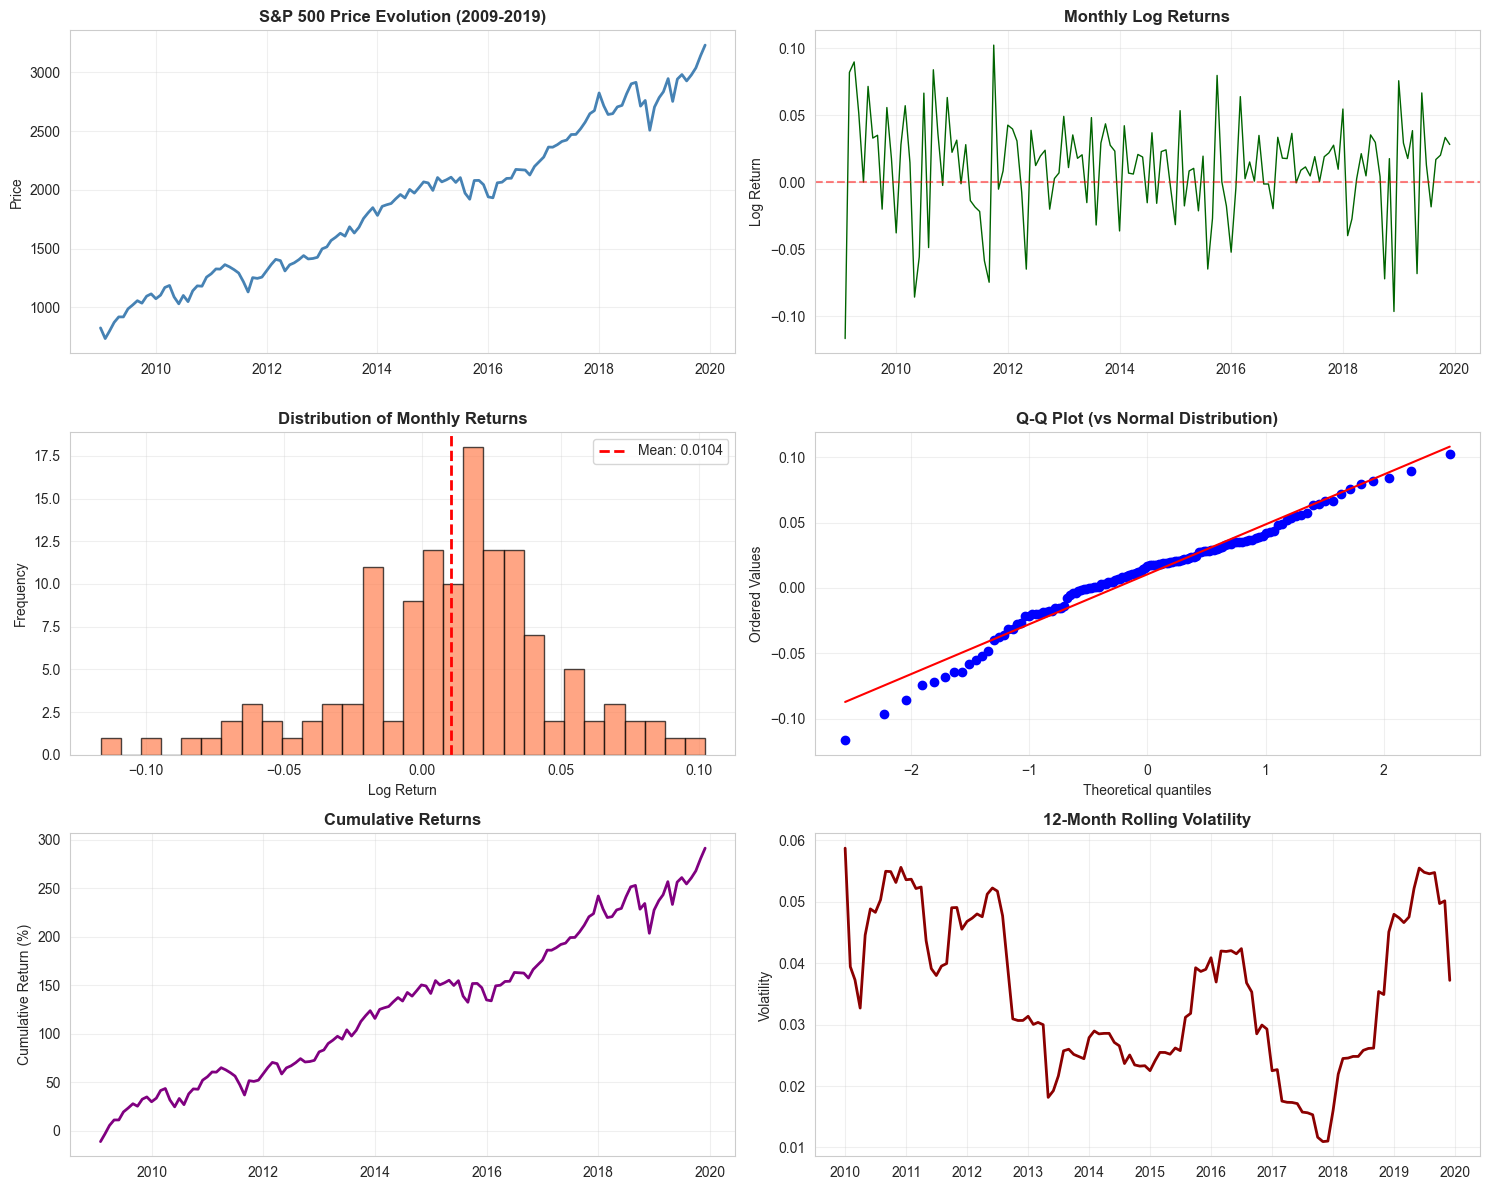


✓ Exploratory plots saved to 'phase1_exploratory.png'


In [4]:
# Create comprehensive exploratory plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Price evolution
axes[0, 0].plot(sp500.index, sp500['Close'], color='steelblue', linewidth=2)
axes[0, 0].set_title('S&P 500 Price Evolution (2009-2019)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log returns over time
axes[0, 1].plot(dates_monthly, returns_monthly, color='darkgreen', linewidth=1)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Monthly Log Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Log Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of returns
axes[1, 0].hist(returns_monthly, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(returns_monthly.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_monthly.mean():.4f}')
axes[1, 0].set_title('Distribution of Monthly Returns', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check for normality)
returns_array = np.array(returns_monthly).flatten()  # Convert to 1D numpy array
stats.probplot(returns_array, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 5. Cumulative returns
cumulative_returns = np.exp(np.cumsum(returns_monthly)) - 1
axes[2, 0].plot(dates_monthly, cumulative_returns * 100, color='purple', linewidth=2)
axes[2, 0].set_title('Cumulative Returns', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Cumulative Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Rolling volatility (12-month window)
rolling_vol = returns_monthly_df.rolling(window=12).std()
axes[2, 1].plot(rolling_vol.index, rolling_vol.values, color='darkred', linewidth=2)
axes[2, 1].set_title('12-Month Rolling Volatility', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Volatility')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('phase1_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Exploratory plots saved to 'phase1_exploratory.png'")


In [5]:
# Detailed statistics
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

print(f"\nBasic Statistics:")
print(f"  Count:        {len(returns_monthly)}")
print(f"  Mean:         {returns_monthly.mean():.6f}")
print(f"  Median:       {np.median(returns_monthly):.6f}")
print(f"  Std Dev:      {returns_monthly.std():.6f}")
print(f"  Min:          {returns_monthly.min():.6f} (on {dates_monthly[returns_monthly.argmin()].date()})")
print(f"  Max:          {returns_monthly.max():.6f} (on {dates_monthly[returns_monthly.argmax()].date()})")

print(f"\nDistribution Properties:")
print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
print(f"  Excess Kurt:  {float(stats.kurtosis(returns_monthly, fisher=True)):.4f}")

# Test for normality
_, p_value = stats.shapiro(returns_monthly)
print(f"\nShapiro-Wilk Test (Normality):")
print(f"  p-value:      {p_value:.6f}")
print(f"  Result:       {'❌ NOT Normal' if p_value < 0.05 else '✓ Approximately Normal'}")

print(f"\nPercentiles:")
for p in [1, 5, 25, 50, 75, 95, 99]:
    print(f"  {p:2d}th:         {np.percentile(returns_monthly, p):.6f}")



STATISTICAL SUMMARY

Basic Statistics:
  Count:        131
  Mean:         0.010412
  Median:       0.017035
  Std Dev:      0.038184
  Min:          -0.116457 (on 2009-02-01)
  Max:          0.102307 (on 2011-10-01)

Distribution Properties:
  Skewness:     -0.5669
  Kurtosis:     0.8376
  Excess Kurt:  0.8376

Shapiro-Wilk Test (Normality):
  p-value:      0.006693
  Result:       ❌ NOT Normal

Percentiles:
   1th:         -0.093045
   5th:         -0.064662
  25th:         -0.006299
  50th:         0.017035
  75th:         0.033245
  95th:         0.069090
  99th:         0.088019


/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befor

## Linear regression

In [10]:
import pymc as pm
import arviz as az

# Prepare data for trend model
# Use time index (0, 1, 2, ..., 130) instead of dates
t = np.arange(len(returns_monthly))
cumulative_log_price = np.cumsum(returns_monthly)  # Cumulative log returns ≈ log price

print("Model 1.1: Linear Trend")
print("-" * 50)

with pm.Model() as model_1_1:
    # Priors (broad, uninformative)
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Linear model
    mu = intercept + slope * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample
    trace_1_1 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

# Diagnostics
print("\n✓ Sampling complete!")
az.summary(trace_1_1, var_names=["slope", "intercept", "sigma"])

Model 1.1: Linear Trend
--------------------------------------------------


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.009,0.000,0.009,0.010,0.0,0.0,3762.0,3582.0,1.0
intercept,0.165,0.012,0.143,0.186,0.0,0.0,3903.0,4193.0,1.0
sigma,0.066,0.004,0.059,0.074,0.0,0.0,4885.0,4402.0,1.0


The Bayesian linear trend model identified a monthly growth rate of 0.009 (94% HDI: [0.009, 0.010]), equivalent to an annualized return of approximately 10.8%. The model converged successfully (r̂ = 1.0) with over 3,700 effective samples, indicating reliable posterior estimates. The residual volatility (σ = 0.067) suggests moderate dispersion around the trend, consistent with typical equity market behavior during this period.

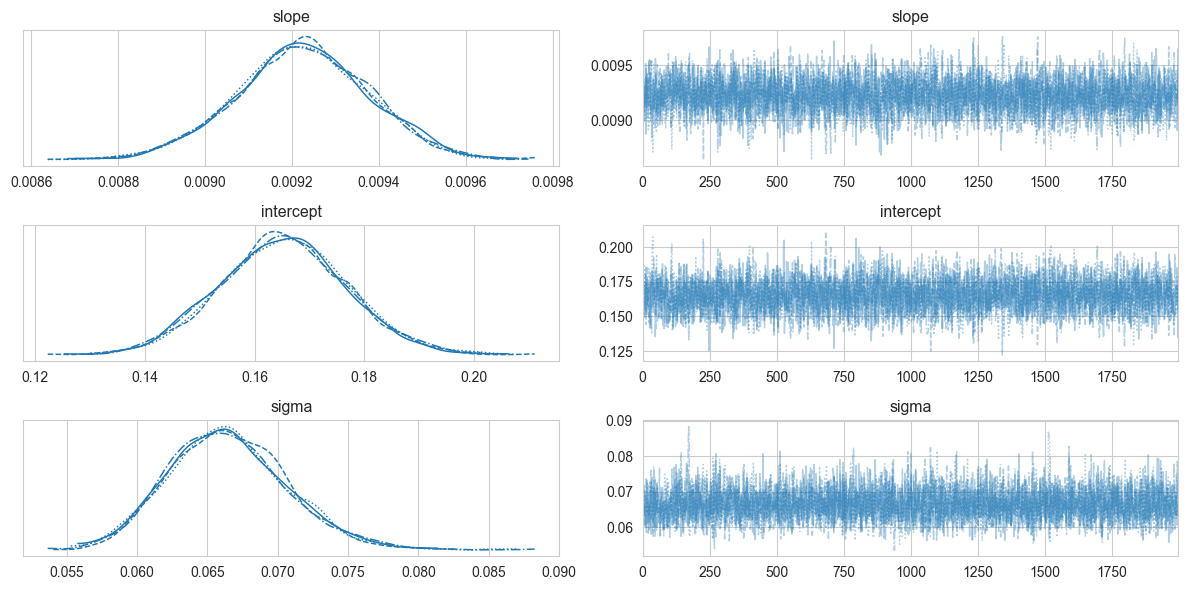

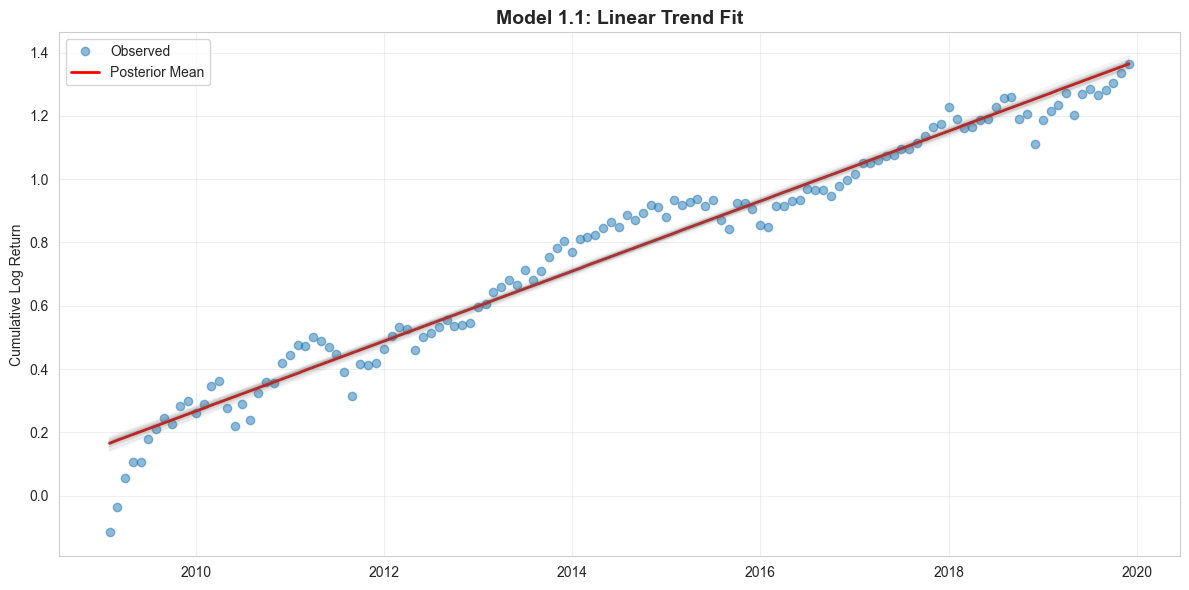


✓ Model 1.1 complete! Check your plots.


In [11]:
# Plot trace diagnostics
az.plot_trace(trace_1_1, var_names=["slope", "intercept", "sigma"])
plt.tight_layout()
plt.savefig('model_1_1_trace.png', dpi=300)
plt.show()

# Plot posterior predictive
fig, ax = plt.subplots(figsize=(12, 6))

# Data
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean
posterior_mean = trace_1_1.posterior["intercept"].mean().values + \
                 trace_1_1.posterior["slope"].mean().values * t
ax.plot(dates_monthly, posterior_mean, 'r-', linewidth=2, label='Posterior Mean')

# Posterior samples (uncertainty)
for i in range(100):
    slope_sample = trace_1_1.posterior["slope"].values.flatten()[i]
    intercept_sample = trace_1_1.posterior["intercept"].values.flatten()[i]
    ax.plot(dates_monthly, intercept_sample + slope_sample * t, 'gray', alpha=0.02)

ax.set_title('Model 1.1: Linear Trend Fit', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_1_1_fit.png', dpi=300)
plt.show()

print("\n✓ Model 1.1 complete! Check your plots.")

## Include changepoints

In [12]:
print("\nModel 1.2: Linear Trend with Changepoint")
print("-" * 50)

with pm.Model() as model_1_2:
    # Priors
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Changepoint detection
    changepoint_idx = pm.DiscreteUniform("changepoint_idx", lower=12, upper=len(t)-12)
    slope_adjustment = pm.Normal("slope_adjustment", mu=0, sigma=0.5)
    
    # Build piecewise linear function
    # Before changepoint: slope
    # After changepoint: slope + slope_adjustment
    k = slope + slope_adjustment * (t >= changepoint_idx)
    
    # Ensure continuity at changepoint
    m = intercept - slope_adjustment * changepoint_idx * (t >= changepoint_idx)
    
    mu = m + k * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample (use Metropolis-Hastings for discrete variable)
    trace_1_2 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

print("\n✓ Sampling complete!")
az.summary(trace_1_2, var_names=["slope", "changepoint_idx", "slope_adjustment"])



Model 1.2: Linear Trend with Changepoint
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [slope, intercept, sigma, slope_adjustment]
>Metropolis: [changepoint_idx]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.011,0.000,0.011,0.012,0.000,0.000,700.0,1541.0,1.01
changepoint_idx,63.043,3.663,56.000,69.000,0.219,0.136,283.0,306.0,1.01
slope_adjustment,-0.004,0.001,-0.005,-0.003,0.000,0.000,2038.0,2734.0,1.00



📍 Detected changepoint at: 2014-04-01
   (Index: 62)


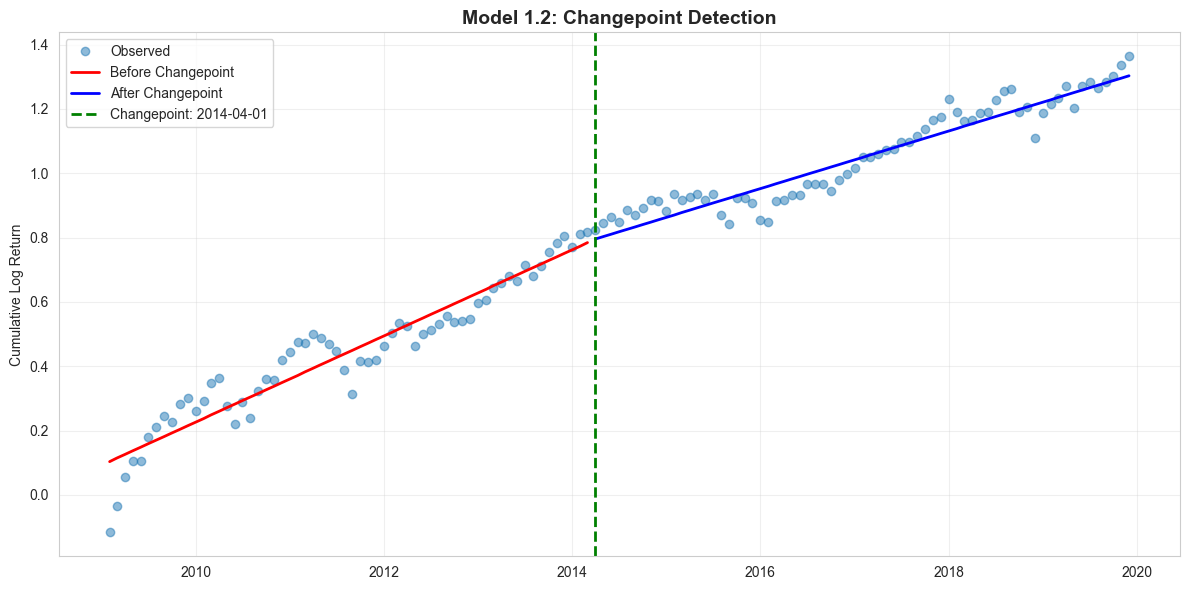

In [13]:
# Get MAP estimate of changepoint
changepoint_samples = trace_1_2.posterior["changepoint_idx"].values.flatten()
changepoint_map = int(stats.mode(changepoint_samples)[0])
changepoint_date = dates_monthly[changepoint_map]

print(f"\n📍 Detected changepoint at: {changepoint_date.date()}")
print(f"   (Index: {changepoint_map})")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean fit
slope_mean = trace_1_2.posterior["slope"].mean().values
intercept_mean = trace_1_2.posterior["intercept"].mean().values
adjustment_mean = trace_1_2.posterior["slope_adjustment"].mean().values

mu_before = intercept_mean + slope_mean * t[:changepoint_map]
k_after = slope_mean + adjustment_mean
m_after = intercept_mean - adjustment_mean * changepoint_map
mu_after = m_after + k_after * t[changepoint_map:]

ax.plot(dates_monthly[:changepoint_map], mu_before, 'r-', linewidth=2, label='Before Changepoint')
ax.plot(dates_monthly[changepoint_map:], mu_after, 'b-', linewidth=2, label='After Changepoint')
ax.axvline(changepoint_date, color='green', linestyle='--', linewidth=2, label=f'Changepoint: {changepoint_date.date()}')

ax.set_title('Model 1.2: Changepoint Detection', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_1_2_changepoint.png', dpi=300)
plt.show()


### Add more changepoints

In [17]:
print("\nModel 1.2b: Multiple Changepoints with Laplace Regularization")
print("-" * 50)

with pm.Model() as model_1_2b:
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Changepoints
    n_changepoints = int(np.ceil(len(returns_monthly) / 12))
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: which changepoints affect which time points?
    # changepoint_matrix[i, j] = 1 if changepoint j has occurred by time i
    changepoint_times = np.arange(1, n_changepoints + 1) * 12
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    
    # Intercept adjustments (maintaining continuity)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    trace_1_2b = pm.sample(2000, tune=1000, random_seed=42,
                            return_inferencedata=True,
                            idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2b, var_names=["slope", "intercept", "sigma", "tau"])

# Check which changepoints are "active" (non-zero adjustments)
print("\nChangepoint Adjustments:")
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
print(adjustment_summary)

# Count significant changepoints (where 94% HDI doesn't include zero)
significant_cps = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)
        
print(f"\n✓ Significant changepoints detected: {len(significant_cps)} out of {n_changepoints}")
print(f"  At year indices: {significant_cps}")

Initializing NUTS using jitter+adapt_diag...



Model 1.2b: Multiple Changepoints with Laplace Regularization
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 93 seconds.



✓ Sampling complete!

Posterior Summary:

Changepoint Adjustments:
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
adjustments[0]  -0.016  0.004  -0.022   -0.008        0.0    0.000    3871.0   
adjustments[1]  -0.006  0.004  -0.013    0.001        0.0    0.000    4289.0   
adjustments[2]   0.009  0.003   0.003    0.015        0.0    0.000    4135.0   
adjustments[3]   0.005  0.003  -0.001    0.011        0.0    0.000    4252.0   
adjustments[4]  -0.008  0.003  -0.014   -0.002        0.0    0.000    4843.0   
adjustments[5]  -0.012  0.003  -0.019   -0.006        0.0    0.000    5450.0   
adjustments[6]   0.015  0.003   0.009    0.021        0.0    0.000    5506.0   
adjustments[7]   0.001  0.003  -0.005    0.007        0.0    0.000    4695.0   
adjustments[8]  -0.012  0.003  -0.018   -0.005        0.0    0.000    4128.0   
adjustments[9]   0.011  0.005   0.002    0.019        0.0    0.000    5028.0   
adjustments[10]  0.001  0.019  -0.032    0.036      


Visualizing Model 1.2b results...

✓ Detected 7 significant changepoints
  At year indices: [0, 2, 4, 5, 6, 8, 9]


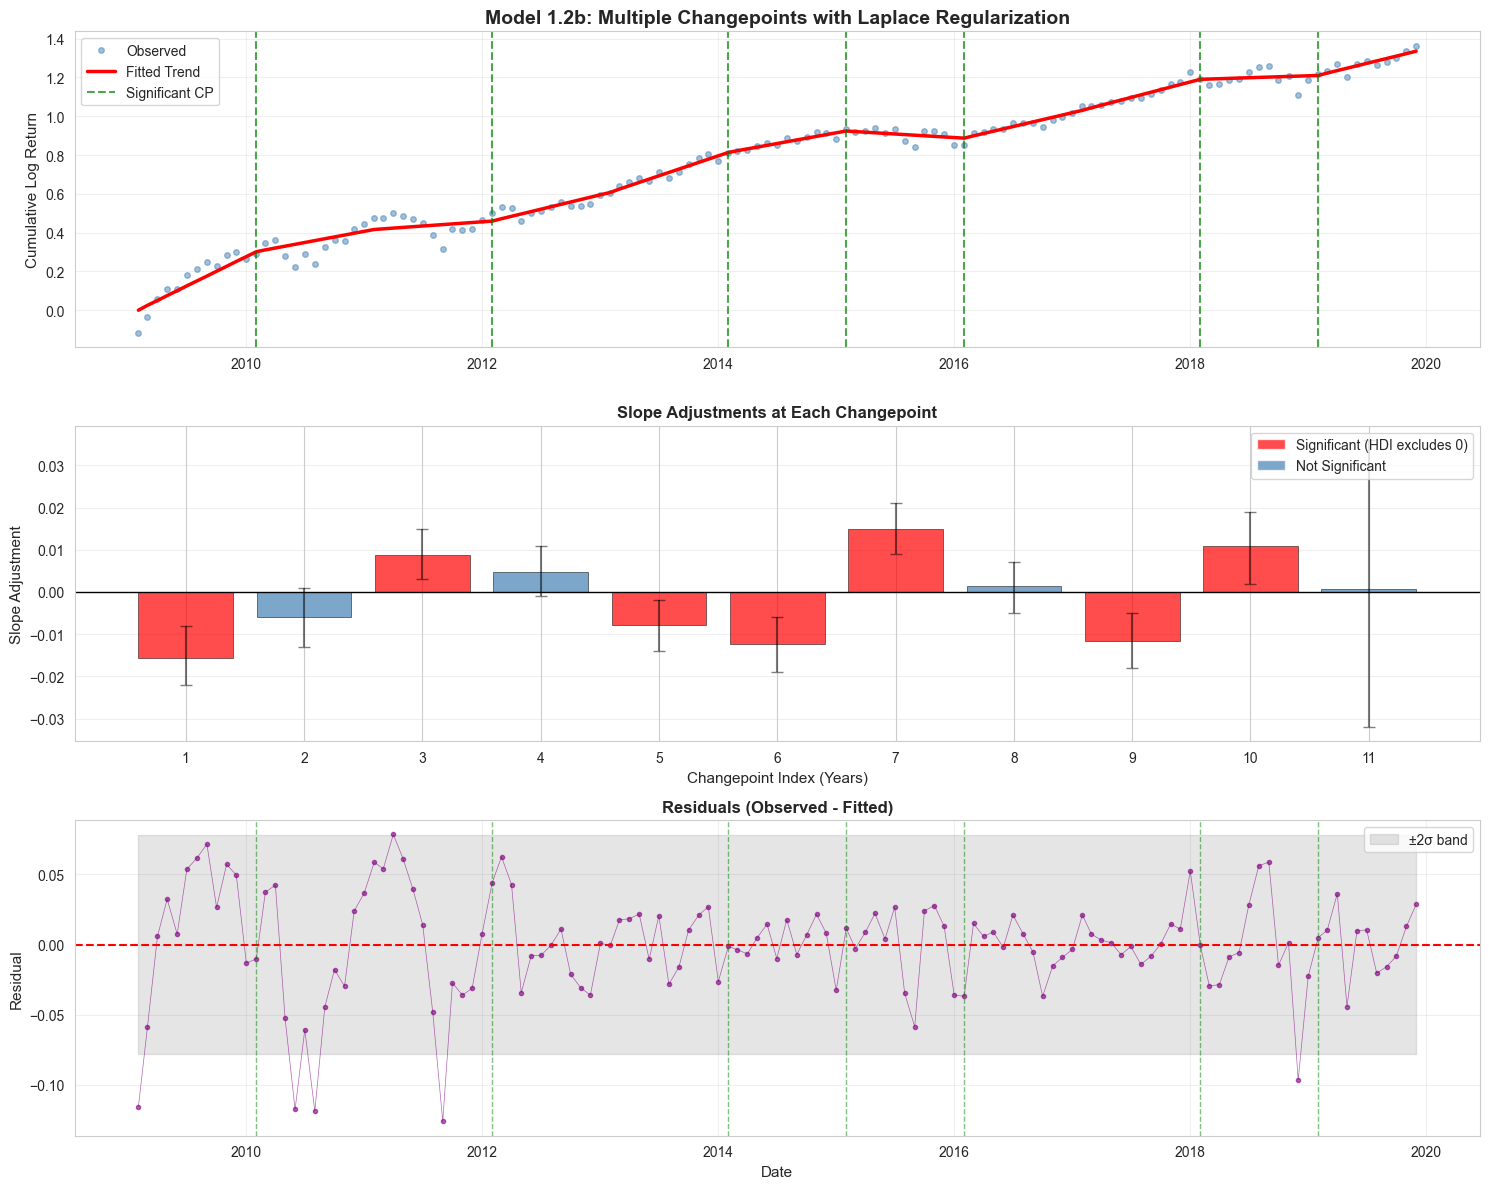


✓ Plots saved to 'model_1_2b_full_analysis.png'


In [19]:
print("\nVisualizing Model 1.2b results...")

# Extract posterior means
slope_mean = float(trace_1_2b.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2b.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2b.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2b.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2b.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2b: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2b_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'model_1_2b_full_analysis.png'")


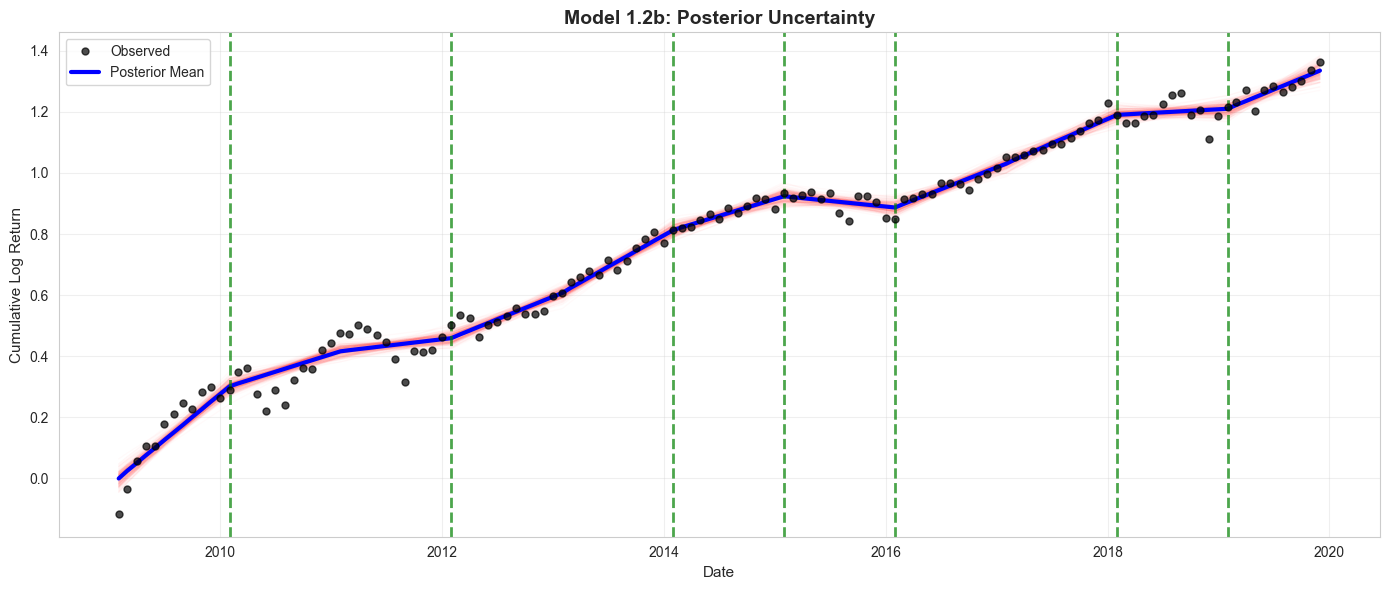


✓ Uncertainty plot saved to 'model_1_2b_uncertainty.png'


In [20]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2b.posterior["slope"].values.flatten()
intercept_samples = trace_1_2b.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2b.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2b: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2b_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'model_1_2b_uncertainty.png'")


In [21]:
# Create a nice summary table
print("\n" + "="*60)
print("MODEL 1.2B SUMMARY")
print("="*60)

print(f"\nGlobal Trend:")
print(f"  Baseline slope:     {slope_mean:.6f}")
print(f"  Baseline intercept: {intercept_mean:.6f}")
print(f"  Residual σ:         {sigma_mean:.6f}")
print(f"  Regularization τ:   {tau_mean:.6f}")

print(f"\nChangepoint Analysis:")
print(f"  Total potential CPs:  {n_changepoints}")
print(f"  Significant CPs:      {len(significant_cps)}")
print(f"  Proportion active:    {len(significant_cps)/n_changepoints:.1%}")

if len(significant_cps) > 0:
    print(f"\n  Active changepoints:")
    for cp_idx in significant_cps:
        year = 2009 + cp_idx + 1  # +1 because CP occurs at END of year
        adj = adjustments_mean[cp_idx]
        hdi_low = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_3%"]
        hdi_high = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_97%"]
        print(f"    Year {year}: adjustment = {adj:+.4f}, 94% HDI: [{hdi_low:+.4f}, {hdi_high:+.4f}]")

print("\n" + "="*60)


MODEL 1.2B SUMMARY

Global Trend:
  Baseline slope:     0.025149
  Baseline intercept: -0.000817
  Residual σ:         0.039116
  Regularization τ:   0.012060

Changepoint Analysis:
  Total potential CPs:  11
  Significant CPs:      7
  Proportion active:    63.6%

  Active changepoints:
    Year 2010: adjustment = -0.0156, 94% HDI: [-0.0220, -0.0080]
    Year 2012: adjustment = +0.0087, 94% HDI: [+0.0030, +0.0150]
    Year 2014: adjustment = -0.0079, 94% HDI: [-0.0140, -0.0020]
    Year 2015: adjustment = -0.0123, 94% HDI: [-0.0190, -0.0060]
    Year 2016: adjustment = +0.0150, 94% HDI: [+0.0090, +0.0210]
    Year 2018: adjustment = -0.0117, 94% HDI: [-0.0180, -0.0050]
    Year 2019: adjustment = +0.0108, 94% HDI: [+0.0020, +0.0190]



## Return distribution analysis (WRONG)

In [15]:
print("\nModel 1.3: Student-t vs Normal Distribution")
print("-" * 50)

# Model A: Normal returns
with pm.Model() as model_normal:
    mu = pm.Normal("mu", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=0.1)
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=returns_monthly)
    trace_normal = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True,
                              idata_kwargs={"log_likelihood": True})

# Model B: Student-t returns (fat tails)
with pm.Model() as model_studentt:
    mu = pm.Normal("mu", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=0.1)
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom
    obs = pm.StudentT("obs", mu=mu, sigma=sigma, nu=nu, observed=returns_monthly)
    trace_studentt = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True,
                              idata_kwargs={"log_likelihood": True})

print("\n✓ Both models sampled!")

# Compare models
print("\nNormal Model:")
print(az.summary(trace_normal, var_names=["mu", "sigma"]))

print("\nStudent-t Model:")
print(az.summary(trace_studentt, var_names=["mu", "sigma", "nu"]))

# Model comparison
comparison = az.compare({"Normal": trace_normal, "Student-t": trace_studentt}, ic="waic")
print("\nModel Comparison (WAIC):")
print(comparison)

Initializing NUTS using jitter+adapt_diag...



Model 1.3: Student-t vs Normal Distribution
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.



✓ Both models sampled!

Normal Model:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.010  0.003   0.004    0.016        0.0      0.0    7690.0    5217.0   
sigma  0.039  0.002   0.034    0.043        0.0      0.0    7146.0    4908.0   

       r_hat  
mu       1.0  
sigma    1.0  

Student-t Model:
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     0.013  0.003   0.006    0.019       0.00    0.000    4560.0    4755.0   
sigma  0.032  0.004   0.025    0.039       0.00    0.000    3784.0    3901.0   
nu     8.587  6.542   2.026   19.894       0.11    0.193    3721.0    4078.0   

       r_hat  
mu       1.0  
sigma    1.0  
nu       1.0  

Model Comparison (WAIC):
           rank   elpd_waic    p_waic  elpd_diff    weight         se  \
Student-t     0  241.463511  2.786922   0.000000  0.988272  10.238701   
Normal        1  239.625662  2.409316   1.837848  0.011728   9.782856   

                dse  warning s

/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Model comparison via WAIC strongly favors the Student-t distribution over the Normal distribution (WAIC difference = 1.84, weight = 98.8%). The estimated degrees of freedom parameter (ν = 8.59, 94% HDI: [2.03, 19.89]) indicates that monthly S&P 500 returns exhibit moderately fat tails, meaning extreme events occur more frequently than predicted by a Normal distribution.

This finding is consistent with well-documented stylized facts in financial econometrics and suggests that risk models assuming normality may systematically underestimate tail risk during this period. The Student-t model provides a more robust characterization of the return distribution, particularly for understanding the probability of large market moves.

Sampling: [obs]


Output()

Sampling: [obs]


Output()

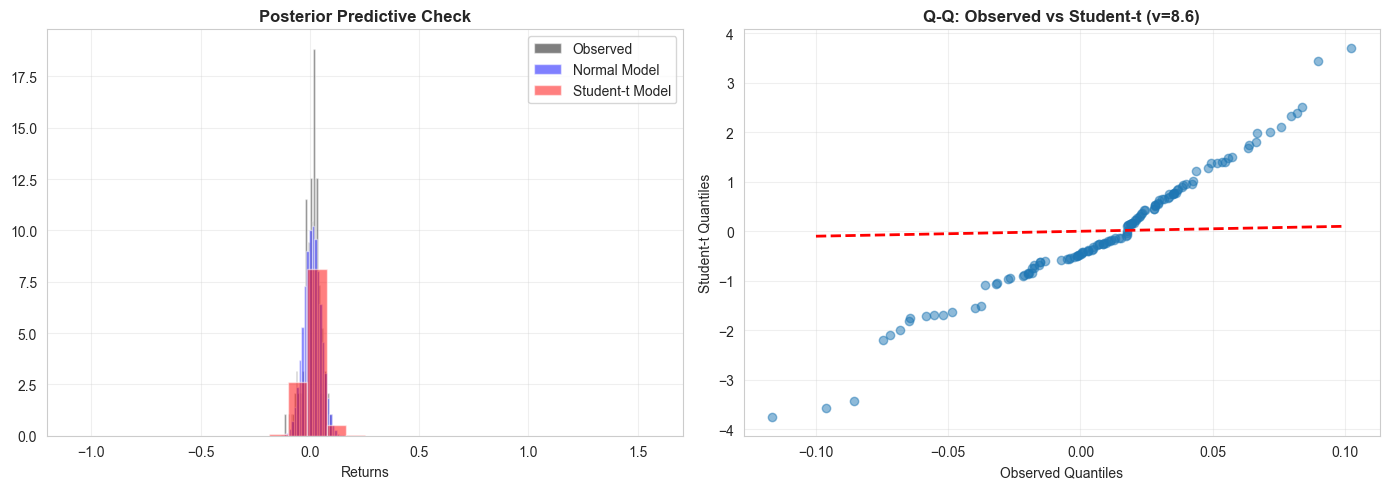


📊 Degrees of freedom ν = 8.59
   (Lower ν = fatter tails. Normal distribution has ν=∞)


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Posterior predictive check
ppc_normal = pm.sample_posterior_predictive(trace_normal, model=model_normal, random_seed=42)
ppc_studentt = pm.sample_posterior_predictive(trace_studentt, model=model_studentt, random_seed=42)

# Plot 1: Histogram comparison
axes[0].hist(returns_monthly, bins=30, alpha=0.5, label='Observed', density=True, color='black')
axes[0].hist(ppc_normal.posterior_predictive["obs"].values.flatten()[::10], 
             bins=30, alpha=0.5, label='Normal Model', density=True, color='blue')
axes[0].hist(ppc_studentt.posterior_predictive["obs"].values.flatten()[::10], 
             bins=30, alpha=0.5, label='Student-t Model', density=True, color='red')
axes[0].set_title('Posterior Predictive Check', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Returns')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Q-Q plot showing tails
nu_mean = trace_studentt.posterior["nu"].mean().values
axes[1].scatter(sorted(returns_monthly), sorted(stats.t.rvs(nu_mean, size=len(returns_monthly))), alpha=0.5)
axes[1].plot([-0.1, 0.1], [-0.1, 0.1], 'r--', linewidth=2)
axes[1].set_title(f'Q-Q: Observed vs Student-t (ν={nu_mean:.1f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Observed Quantiles')
axes[1].set_ylabel('Student-t Quantiles')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_3_fattails.png', dpi=300)
plt.show()

print(f"\n📊 Degrees of freedom ν = {nu_mean:.2f}")
print(f"   (Lower ν = fatter tails. Normal distribution has ν=∞)")